# 3. házi feladat

**Feldat:** A harmadik házi feladat keretében, egy adott járműtípust ábrázoló képekről a jármű kiszegmentálását kell konvolúciós hálóval megtanulni. Mivel az adott járműtípushoz nem áll rendelkezésünkre sok pixelszintű annotációt tartalmazó mintapélda, ezért transfer learning-et fogunk alkalmazni. Így tehát, a szegmentációra való betanítást nem egy véletlenszerűen inicializált hálón kezdjük el, hanem egy másik feladaton előtanított hálón. Az előtanítási feladat 10 kategóriába sorolt, különböző állatokat és járműveket ábrázoló képek klasszifikációja lesz. Ehhez a feladathoz jóval több címkézett adat rendelkezésünkre áll.

**Adatbázis:** A feladat során a Pascal VOC adatbázis egy csökkentett felbontású részhalmazával kell dolgozni. Az adatbázisban tíz kategóriába (négy fajta jármű és hat fajta állat) sorolt objektumokról készült képek vannak. Az adatbázis két részből áll:

- A klasszifikációs rész két pickle fájlt tartalmaz, különböző kategóriájú képek és a hozzájuk tartozó kategóriacímkék találhatók meg benne.

- A szegmentációs rész is két pickle fájlból áll. Az egyikben képek, míg a másikban a hozzájuk tartozó pixelszintű szegmentációs címkék találhatók. 

**Az előtanítási feladat:** Az előtanítási feladatban képek multiclass klasszifikációját tanuljuk meg egy hagyományos konvolúciós háló segítségével. Mivel a célfeladatunk egy adott járműtípus kiszegmentálása lesz (hallgatónként változó, hogy melyik), alapvetően járművekre szeretnénk koncentrálni az előtanítás során is. Négy kategóriát alakítunk ki az eredetileg tíz kategóriába sorolt képekből: a négy eredeti jármű kategóriából azt a hármat választjuk ki, amelyek nincsenek a célfeladatunkban. 

A negyedik, szegmentációhoz használt járműfajtát az előtanítás során nem használjuk fel. Ezt azért tesszük, mert a képek egy része megtalálható mind a klasszifikációs, mind a szegmentációs adatbázisban, nincsenek összepárosítva, így ahhoz, hogy elkerüljük azt az esetleges szituációt, hogy a szegmentációs feladat során a teszthalmazba az előtanítás közben látott tanítóminták kerüljenek, inkább teljesen kihagyjuk ezt a kategóriát az előtanításból.

Az előtanítás negyedik kategóriája a három fajta jármű mellett az összes állatos kép lesz, egyetlen közös kategóriába sorolva.

**A célfeladat:** A célfeladat bináris szegmentáció lesz az előtanításkor kihagyott járműkategóriára. A szegmentációs adatbázisból kinyerjük azokat a képeket, melyeken legalább egy pixelnyi terjedelemben megtalálható ez a járműtípus, majd az előtanított hálót átalakítással szegmentációra alkalamssá tesszük (Fully-Convolutional Network architektúra). Az így kapott hálót tanítjuk tovább a képeink minden pixelére megbecsülni, hogy az a pixel az adott járműtípust, vagy bármi mást ábrázol. (Azaz, lényegében pixelenkénti bináris klasszifikációt végzünk.)

**Instrukciók:** 

A házi feladat több részfeladatból áll (A - Q), melyek egymásra épülnek. A B, G, K és O részfeladatokból több változat van, ezekből mindenkinek egyet-egyet kell megoldania. **Arról, hogy ki melyiket oldja meg, az alábbi linken található lista ad tájékoztatást** Neptun-kód - feladatok listája formában:

http://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc21_p1_hw3/annbsc21_p1_hw3_assignments.txt 

A több részfeladat esetében mindenkinek ugyanazt kell megoldania.

A feladat automatikus tesztelőszkripttel rendelkezik. Éppen ezért, **ne változtasd meg a notebook struktúráját**, ne szedd több részre, illetve ne módosítsd a megírt részeket, csak a megoldásaidat írd be a megfelelő helyre, különben nem fogjuk tudni értékelni. A megoldások az `# Implement your solution BELOW` és `# Implement your solution ABOVE` sorok közé írandók. Ha a megoldott részfeladatok futtatásakor a "Tester: .... OK" felirat megjelenik, _feltehetően_ jó a megoldás.

**!!! A feladatok megoldását, vagy az arra mutató linkeket bárhol közzétenni tilos !!!**

Elakadás esetén a (10. és) 11. előadást, valamint a HF3 GYIK Canvas fórumot javasoljuk megtekinteni először. Ha itt nem található megoldás a problémára, akkor nyugodtan lehet kérdezni a fórumon, vagy üzenetben. Kérjük, hogy mindkét oktatót címezzétek kérdés esetén!

**Megoldás és beküldés menete:**

A közzétett, feladatokat tartalmazó Google Colab notebook csak "view" jogosultságokkal van megosztva, így, bár a notebook szerkeszthetőnek látszik, az úgynevezett "Playground" módban nyílik meg, ahol a változtatások nem lesznek mentve. Mindenkinek le kell másolnia a saját Drive-jára a notebook-ot (Google Colab file menü -> Save a copy to Drive): a másolat már maradandóan szerkeszthető és futtatható lesz. **A kész megoldást tartalmazó notebook-ot le kell tölteni**  (Google Colab file menü -> Download .ipynb), **majd a Canvas-ban, a kiírt feladatnál feltölteni.** Link nem adható be, csak az .ipynb fájl. Alternatívaként, Google Colab helyett saját gépen futó Python-nal és Jupyter-rel is szerkeszthetők és futtathatók .ipynb notebookok.

**Első határidő:** 2021. május 20., csütörtök, 23:59.

**Végső határidő:** A vizsgaidőszak vége - **!!! A végső határidőig mindenkinek az oktatók által elfogadható, beadott megoldással kell rendelkeznie, ezt követően pótlásra és/vagy javításra nincs lehetőség. A vizsgaidőszakot követően, utólagos jegybeírási kérelmeket nem írunk alá. !!!**

**Pontozás:** A házi feladat helyes megoldása feltétele a jegyszerzésnek. Az, aki az első határidőig teljes, legfeljebb apró hibákat tartalmazó megoldást adott be, 2 extra pontot kap.

**Kikötés:** Ahol csak lehet, hatékony megoldásokat várunk. Ciklust, illetve hasonló, nem hatékony, nem vektorizált konstrukciót csak akkor fogadunk el, ha kis számú iteráció történik (pl. kategóriák mentén). Egy kivétel: a képek átméretezésénél, külső könyvtár átméretező függvénye hívható ciklusban a képekre, de az átméretezés is megoldható ciklus nélkül, egyébként.

**GPU használata Google Colab-ban:** A konvolúciós háló betanítása több erőforrást igényel, így érdemes a betanításhoz bekapcsolni a GPU gyorsítást. *Edit -> Notebook settings -> Hardware accelerator: GPU*

A betanításon kívüli fejlesztési fázisban előnyös lehet a GPU gyorsítást kikapcsolni, ugyanis a Google az erőforrások kiosztásánál, saját bevallása szerint, azokat a felhasználókat részesíti előnyben, akik nem használnak GPU-t rendszeresen, sok órán át, vagy nem hagynak csatlakoztatott GPU-s futtatókörnyezetet sokáig kihasználatlanul. A H és P kódblokkokon kívül semelyik másik feladatnál nem ad előnyt a GPU gyorsítás. _"To avoid hitting your GPU usage limits, we recommend switching to a standard runtime if you are not utilizing the GPU."_ (A usage limit nem nyilvános és dinamikusan van meghatározva. Néhány órányi használat nem valószínű, hogy kimeríti.) A GPU ki- és bekapcsolásakor a futtatókörnyezethez rendelt tárhely tipikusan megváltozik, ezért érdemes lehet a már betanított modellek súlyait kimenteni és letölteni (Lásd HF3 GYIK -> checkpoint-ok)!



Tesztelő szkript letöltése, importok.

In [1]:
# Download tester
!rm hw3_tester.py
!wget http://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc21_p1_hw3/hw3_tester.py

import os
import pickle
import cv2

from google.colab import files
import matplotlib.pyplot as plt
import numpy as np

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, Dropout, MaxPooling2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.optimizers

# import tester after importing tensorflow, to make sure correct tf version is imported
from hw3_tester import Tester


rm: cannot remove 'hw3_tester.py': No such file or directory
--2021-05-29 03:14:03--  http://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc21_p1_hw3/hw3_tester.py
Resolving nipg12.inf.elte.hu (nipg12.inf.elte.hu)... 157.181.160.172
Connecting to nipg12.inf.elte.hu (nipg12.inf.elte.hu)|157.181.160.172|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24785 (24K) [text/plain]
Saving to: ‘hw3_tester.py’

hw3_tester.py       100%[===================>]  24.20K  --.-KB/s    in 0.1s    

2021-05-29 03:14:04 (232 KB/s) - ‘hw3_tester.py’ saved [24785/24785]



A tesztelőszkript a részedre kiosztott feladatok helyességét fogja tesztelni. Ehhez az alábbi kódblokkban, a Tester példányosításakor, paraméterként a Neptun-kódodat kell megadni egy sztringként, pl: 
`tester = Tester('DK7UAQ')`, majd futtatni kell a blokkot.


In [2]:
tester = Tester('enpcte')

Letöltjük az előfeldolgozott adatbázist, ha nem található meg a futtatókörnyezet tárhelyén. A képeket tartalmazó fájlok együttes mérete 400 megabájt körüli, 1-2 percet igénybe vehet a letöltése a futtatókörnyezet tárhelyére. Előfordul, hogy a tárhelyen elérhetők maradnak a fájlok akkor is, ha a futtatókörnyezetről lekapcsolódunk, de ez nem garantált.

In [3]:
!wget -nc -P VOC2012/ http://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc21_p1_hw3/VOC2012/class_data.pkl
!wget -nc -P VOC2012/ http://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc21_p1_hw3/VOC2012/class_label.pkl
!wget -nc -P VOC2012/ http://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc21_p1_hw3/VOC2012/seg_data.pkl
!wget -nc -P VOC2012/ http://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc21_p1_hw3/VOC2012/seg_label.pkl

--2021-05-29 03:14:06--  http://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc21_p1_hw3/VOC2012/class_data.pkl
Resolving nipg12.inf.elte.hu (nipg12.inf.elte.hu)... 157.181.160.172
Connecting to nipg12.inf.elte.hu (nipg12.inf.elte.hu)|157.181.160.172|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 326271136 (311M) [text/plain]
Saving to: ‘VOC2012/class_data.pkl’

class_data.pkl      100%[===================>] 311.16M  23.4MB/s    in 13s     

2021-05-29 03:14:19 (24.5 MB/s) - ‘VOC2012/class_data.pkl’ saved [326271136/326271136]

--2021-05-29 03:14:19--  http://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc21_p1_hw3/VOC2012/class_label.pkl
Resolving nipg12.inf.elte.hu (nipg12.inf.elte.hu)... 157.181.160.172
Connecting to nipg12.inf.elte.hu (nipg12.inf.elte.hu)|157.181.160.172|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66535 (65K) [text/plain]
Saving to: ‘VOC2012/class_label.pkl’

class_label.pkl     100%[===================>]  64.98K   316

Az adatbázis beolvasása.

In [4]:
CAT_NAMES = ['aeroplane', 'bird', 'boat', 'bus', 'car', 'cat', 'cow', 'dog', 'horse', 'sheep']

with open('VOC2012/class_data.pkl', 'rb') as f:
    arr_cl_data = pickle.load(f)
with open('VOC2012/class_label.pkl', 'rb') as f:
    arr_cl_labs = pickle.load(f)
with open('VOC2012/seg_data.pkl', 'rb') as f:
    arr_seg_data = pickle.load(f)
with open('VOC2012/seg_label.pkl', 'rb') as f:
    arr_seg_labs = pickle.load(f)
    
print("Shape of classification image array:", arr_cl_data.shape)
print("Shape of classification label array:", arr_cl_labs.shape)
print("Shape of segmentation image array:", arr_seg_data.shape)
print("Shape of segmentation label array:", arr_seg_labs.shape)

Shape of classification image array: (6638, 128, 128, 3)
Shape of classification label array: (6638, 10)
Shape of segmentation image array: (1735, 128, 128, 3)
Shape of segmentation label array: (1735, 128, 128)


Az `arr_cl_data` tömb alakja (n_cl_images, size_y, size_x, n_channels=3), a klasszifikációhoz használandó RGB kódolású képeket tartalmazza 10 kategóriából válogatva. Az `arr_cl_labs` címketömb az ezeken a képeken megtalálható objektumok kategória-azonosítóit tartalmazza. Alakja (n_cl_images, n_categories=10). Minden képre 10 darab számot tárol (nullát, vagy egyet), aszerint, hogy az adott kategóriájú objektum előfordul-e a képen. Egy képen többféle objektum is megtalálható lehet, ekkor nyilván több egyes számjegy van a címketömb adott képhez tartozó sorában.

Az `arr_seg_data` tömb az `arr_cl_data` tömbhöz hasonló formátumú, de jóval kevesebb kép van benne, alakja (n_seg_images, size_y, size_x, n_channels=3). Ezekhez a képekhez pixel szintű annotáció is tartozik, ami az `arr_seg_labs` tömbben van eltárolva, így szegmentálás betanításához használhatók. A `arr_seg_labs` tömb alakja (n_seg_images, size_y, size_x). Minden pixelre egy `uint8` típusú számot tárol, ami a következő lehet: 0 - háttér, 1 .. 10 - valamelyik kategória a 10 közül, 255 - kategóriák közti határvonal.

Érdemes odafigyelni a kategóriák azonosítóinál: a klasszifikációs címketömbben az egyes kategóriák a 0-tól 9-es indexeken vannak (lévén 10 hosszú a tengely), míg a szegmentációs címkék pixelei ugyanezeket a kategóriákat 1-től 10-es értékekkel kódolják.

###**A**: Képek kirajzolása a klasszifikációs adatbázisból

Elsőként belenézünk a letöltött klasszifikációs adatbázis tartalmába. Rajzolj ki néhány képet az `arr_cl_data` tömbből és írd ki az adott kép kategóriájának nevét a kirajzolt képek alá/fölé! A kategórianevek az előző kód blokkban a `CAT_NAMES` listában meg lettek adva.

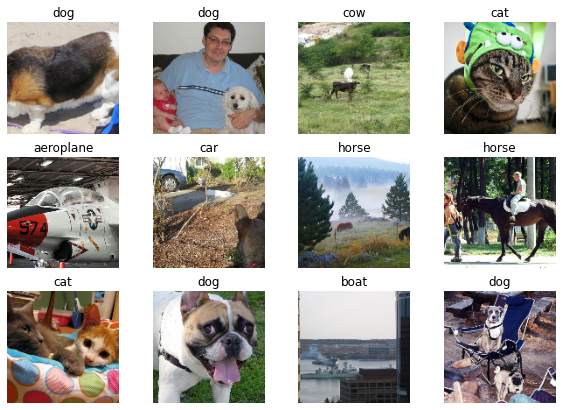

In [5]:
# implement your solution BELOW
idxs = np.random.choice(arr_cl_labs.shape[0], size=12)
fig, axes = plt.subplots(3, 4)
fig.set_figwidth(10)
fig.set_figheight(7)
for ind, axe  in enumerate(axes.reshape(-1)):
  axe.axis("off")
  axe.imshow(arr_cl_data[idxs[ind]])
  axe.set_title(CAT_NAMES[np.argmax(arr_cl_labs[idxs[ind]])])
  


# implement your solution ABOVE

###**B**: Új kategóriák definiálása a klasszifikációhoz

Mivel járműveket szeretnénk tudni felismerni/szegmentálni, a multi-class klasszifikációban ezekre a kategóriákra fogunk koncentrálni. A klasszifikációs feladatban 4 kategória egyikébe kell a képeinket megtanulni besorolni. A jármű kategóriákat megtanuljuk elkülöníteni egymástól, a fennmaradó kategóriákat "other" címen egy kategóriába soroljuk. A klasszifikációhoz elkülönítendő 4 kategória tehát a következő:

- **B/1**: ['boat', 'bus', 'car', {'bird', 'cat', 'dog', 'horse', 'sheep', 'cow'}]
- **B/2**: ['aeroplane', 'bus', 'car', {'bird', 'cat', 'dog', 'horse', 'sheep', 'cow'}]
- **B/3**: ['aeroplane', 'boat', 'car', {'bird', 'cat', 'dog', 'horse', 'sheep', 'cow'}]
- **B/4**: ['aeroplane', 'boat', 'bus', {'bird', 'cat', 'dog', 'horse', 'sheep', 'cow'}]

(Később, a szegmentációs feladatban mindenkinek az egyetlen számára kimaradt jármű kategóriát kell tudnia tanulni szegmentálni, az összes másik kategória és a háttér ellenében.)

Készítsd el a `sample_idxs_ls` listát! A lista legyen 4 hosszú, az elemei a fent megjelölt új kategóriában megtalálható képek/címkék index-tömbjei. Az index tömbök elemei az `arr_cl_data` és `arr_cl_labs` tömbökből a megfelelő kategóriájú elemeket hivatkozzák. Például a lista első eleme a 'boat' kategóriába tartozó képek indexeit tartalmazó tömb, a lista utolsó eleme a {'bird', 'cat', 'dog', 'horse', 'sheep', 'cow'} kategóriák egyikébe tartozó képek indexeit tartalmazó tömb, stb. Csak azoknak a képeknek az indexeit válogasd be a `sample_idxs_ls` listába, amelyeken pontosan egy kategória szerepel! Azokat a képeket, melyeken több kategória szerepel egyszerre, nem fogjuk felhasználni a klasszifikációs feladatban.

Mivel a jarművek gyakori képi mintázatait szeretnénk a leginkább megtanulni felismerni, ezért szükséges, hogy a betanításhoz használt adatbázis elemei közt a járművek legyenek többségben. Az utolsó 'other' kategória az adatbázisunkban felülreprezentált, túl sok elem esik ebbe a kategóriába, így ezeknek csak egy részét tartjuk meg. Válassz **véletlenszerűen** 1000 indexet az utolsó 'other' kategória indexei közül és csak ezek kerüljenek bele a `sample_idxs_ls[-1]` tömbbe!

In [6]:
# implement your solution BELOW
AEROPLANE_INDX = 0
BOAT_INDX = 2
BUS_INDX = 3
#CAT_NAMES = ['aeroplane', 'bird', 'boat', 'bus', 'car', 'cat', 'cow', 'dog', 'horse', 'sheep']
print(arr_cl_labs.shape)

single_mask = np.sum(arr_cl_labs, axis = 1) == 1
aeroplane_mask = np.argmax(arr_cl_labs, axis = 1) == AEROPLANE_INDX
boat_mask = np.argmax(arr_cl_labs, axis = 1) == BOAT_INDX
bus_mask = np.argmax(arr_cl_labs, axis = 1) == BUS_INDX

indxes = np.arange(arr_cl_labs.shape[0])
aeroplane_list = indxes[np.logical_and(single_mask, aeroplane_mask)]
boat_list = indxes[np.logical_and(single_mask, boat_mask)]
bus_list = indxes[np.logical_and(single_mask, bus_mask)]

all_thogether = np.logical_and(np.logical_or(aeroplane_mask, np.logical_or(boat_mask, bus_mask)), single_mask)
other_list = np.setdiff1d(indxes, indxes[all_thogether])

assert(arr_cl_labs.shape[0] - len(aeroplane_list) - len(boat_list) - len(bus_list) == len(other_list))

random_element_indxs = np.random.choice(other_list.shape[0], size=1000)
other_list = other_list[random_element_indxs]

sample_idxs_ls = [ aeroplane_list, boat_list, bus_list, other_list ]


# implement your solution ABOVE

print("Category shapes:", [cat_samples.shape for cat_samples in sample_idxs_ls])

tester.test('cl_categories', sample_idxs_ls)

(6638, 10)
Category shapes: [(636,), (476,), (313,), (1000,)]
Tester: Classifier new categories OK


###**C**: A klasszifikációhoz felhasználandó adatok kiválogatása
A `sample_idxs_ls` tömbök listájában előállítottuk, hogy melyik kategóriába melyik képek/címkék tartoznak az eredeti (`arr_cl_data` és `arr_cl_labs`) tömbökből. Az előállított indextömböket az `arr_cl_data` és `arr_cl_labs` tömbök indexelésére használva készítsd el a képeket és címkéket tartalmazó `xs` és `ys` tömböket, ahol `xs` alakja (n_cl_good_images, size_y, size_x, n_channels=3) és `ys` alakja (n_cl_good_images,). Utóbbi az új kategóriák indexeit tartalmazza (pl. B/4. feladat esetén 'aeroplane' -> 0, 'boat' -> 1, 'bus' -> 2, 'other' -> 3)!

(Itt "n_cl_good_images" a `sample_idxs_ls`-beli tömbök hosszának összege, azaz a felhasznált képek száma az összes kategóriából.)


In [7]:
# implement your solution BELOW

n_cl_good_images = 0
for indxs in sample_idxs_ls:
  n_cl_good_images += len(indxs)
xs = arr_cl_data[sample_idxs_ls[0]]
ys = np.ones((len(sample_idxs_ls[0]))) * 0 

for num in range(1,len(sample_idxs_ls)):
  xs = np.concatenate((xs, arr_cl_data[sample_idxs_ls[num]]), axis=0)
  ys = np.concatenate((ys, np.ones(len(arr_cl_data[sample_idxs_ls[num]]))*num), axis=0 )


print(xs.shape, ys.shape)
print(np.unique(ys))
print(xs.shape)
# implement your solution ABOVE

tester.test('cl_dataset_creation', xs, ys)

(2425, 128, 128, 3) (2425,)
[0. 1. 2. 3.]
(2425, 128, 128, 3)
Tester: Classifier dataset OK


###**D**: Keverés, normalizálás és felbontás tanító-, validációs- és teszthalmazra

- Keverjük meg konzisztensen a képeket (`xs`) és a kategóriacímkéket (`ys`). Ez szükséges, hiszen a két tömböt valószínűleg úgy állítottuk elő az előző kódblokkban, hogy a kategóriacímkék sorban következnek egymás után, így a tanító-, validációs- és teszthalmazra való felbontásnál előfordulna olyan kategória, amelyik csak az egyik halamzban lenne jelen.
- Mivel az input változók nagyságrendje azonos (0..255), így ezúttal nem fogjuk a hagyományos változónként független min-max/mean-std skálázást használni. Azonban, a gradiens visszaterjesztés tulajdonságai miatt nem jó, ha az input, vagy a köztes reprezentációk nagyságrendje túl kicsi, vagy túl nagy. Ezért, lineárisan skálázva transzformáljuk a [0,255] intervallumon található pixelértékeket [0,1] intervallumra. A skálázás előtt szükséges az eredetileg `uint8` típusú pixelértékeket lebegőpontossá (`float32`) konvertálni.
- Bontsuk fel tanító-, validációs- és teszthalmazra a két tömböt. Használjunk 70%/15%/15%-os felosztást. Állítsuk elő így az `x_train`, `x_val`, `x_test` inputokat (képeket) és `y_train`, `y_val`, `y_test` címkéket tartalmazó tömböket!

In [8]:
# implement your solution BELOW
premutation = np.random.permutation(xs.shape[0])
xs = xs[premutation]
ys = ys[premutation]

xs = xs.astype(np.float32)
xs = xs/255.


FIRST_SECTION = int(len(ys)*0.7)
SECOND_SECTION = int(len(ys)*0.85)

x_train = xs[0:FIRST_SECTION]
y_train = ys[0:FIRST_SECTION]
x_val = xs[FIRST_SECTION:SECOND_SECTION]
y_val = ys[FIRST_SECTION:SECOND_SECTION]
x_test = xs[SECOND_SECTION:]
y_test = ys[SECOND_SECTION:]

# implement your solution ABOVE

print("Training set shapes:", x_train.shape, y_train.shape)
print("Validation set shapes:", x_val.shape, y_val.shape)
print("Test set shapes:", x_test.shape, y_test.shape)

tester.test('cl_dataset_split', x_train, x_val, x_test, y_train, y_val, y_test)

Training set shapes: (1697, 128, 128, 3) (1697,)
Validation set shapes: (364, 128, 128, 3) (364,)
Test set shapes: (364, 128, 128, 3) (364,)
Tester: Classifier dataset split OK


###**E**: Véletlen választott kép-címke párok kirajzolása/kiírása

Győződj meg róla, hogy nem történt-e a keverés során hiba és továbbra is minden képhez megfelelő (új kategória-felosztás szerinti) címke tartozik.

Rajzolj ki néhány **véletlenszerűen választott** képet az `x_train`, `x_val`, `x_test` tömbök egyikéből és írasd ki a képek alatt/felett a képekhez tartozó új kategória indexét (0, 1, 2 vagy 3)!

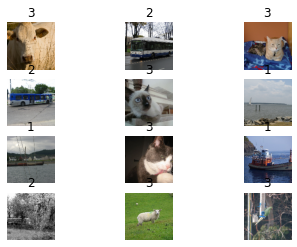

In [9]:
# implement your solution BELOW
indexes = np.random.choice(x_train.shape[0], size=12)

fig, axes = plt.subplots(4,3)
fig.set_figwidth=6
fig.set_figheight=6
for num, axe in enumerate(axes.reshape(-1)):
  axe.imshow(x_train[indexes[num]])
  axe.set_title( str(int(y_train[indexes[num]])))
  axe.axis("off")
  



# implement your solution ABOVE

###**F**: Konvolúciós háló definiálása klasszifikációhoz

Definiálj egy konvolúciós hálót Keras-ban és add értékül a `cl_model` változónak. A háló lehetőleg kövesse a hagyományos konvolúciós architektúrát, felváltva alkalmazott konvolúciós és pooling rétegekkel, majd teljesen összekötött rétegekkel a végén. A hálónak mindenképp legyen olyan köztes rétege melynek kimenetén a heatmap-ek felbontása 16x16 pixel, ugyanis erre a rétegre fogjuk építeni a szegmentáló modellünket. 

A 11. előadás notebookban megtalálható hálóarchitektúrát nyugodtan felhasználhatod itt is, viszont az utolsó réteg mérete és aktivációs függvénye, valamint a költségfüggvény eltérő lesz. Egyrészről, a kettőnél több kategória esetén alkalmazott multi-class klasszifikációnál szokásos aktivációs- és költségfüggvényt kell alkalmaznod. Ezenkívül, érdemes lehet Max pooling rétegek helyett Average pooling rétegeket alkalmazni, magyarázatért lásd: Canvas HF3 GYIK fórum.

Bár a címkékhez a one-hot kódolást kézzel is elő lehet állítani, mi ezúttal ezt nem tesszük meg: a Keras tudja kezelni az eredeti kategóriacímke-tömböt is, ha a szokásos költség "sparse" változatát használjuk. Lásd: https://keras.io/api/losses/probabilistic_losses/#sparsecategoricalcrossentropy-class

A modellt fordítsd le a `compile()` függvény segítségével!

In [40]:
# implement your solution BELOW
input = Input(shape=(x_train.shape[1:4]))  #128x128x3
conv1_1 = Conv2D(64, (3,3), padding="same", activation="relu")(input)
conv1_2 = Conv2D(64, (3,3), padding="same", activation="relu")(conv1_1)
pool1 = MaxPooling2D(pool_size=(2,2))(conv1_2)     #64x64x20
conv2_2 = Conv2D(128, (3,3), padding="same", activation="relu")(pool1)
conv2_3 = Conv2D(128, (3,3), padding="same", activation="relu")(conv2_2)
pool2 = MaxPooling2D(pool_size=(2,2))(conv2_3)     #32x32x40
conv3_1 = Conv2D(256, (3,3), padding="same", activation="relu")(pool2)
conv3_2 = Conv2D(256, (3,3), padding="same", activation="relu")(conv3_1)
conv3_3 = Conv2D(256, (3,3), padding="same", activation="relu")(conv3_2)
pool3 = MaxPooling2D(pool_size=(2,2))(conv3_3)     #16x16x80
conv4_1 = Conv2D(512, (3,3), padding="same", activation="relu")(pool3)
conv4_2 = Conv2D(512, (3,3), padding="same", activation="relu")(conv4_1)
conv4_3 = Conv2D(512, (3,3), padding="same", activation="relu")(conv4_2)
pool4 = MaxPooling2D(pool_size=(2,2))(conv4_3)     #8x8x160
flat = Flatten()(pool4)
dens1 = Dense(1024, activation="relu")(flat)
dens2 = Dense(516, activation="relu")(dens1)
dens3 = Dense(4, activation="softmax")(dens2)
cl_model = Model(inputs=[input], outputs=[dens3])


cl_model.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

cl_model.summary()
# implement your solution ABOVE

tester.test('cl_architecture', cl_model)

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 32, 32, 128)       0  

###**G**: Input generátorok definiálása augmentáláshoz

Sajnos a néhány ezer képből álló adatbázisunkra hamar túltanulna a hálónk és nincs lehetőségünk új tanítóadatot beszerezni, így az adat-augmentálás technikájához kell fordulnunk.
Bár megtehetnénk azt is, hogy véletlenszerűen választott transzformációkkal augmentálunk egy adatbázist a betanítás előtt és ezzel az augmentált, fix méretű adatbázissal tanítunk, de ebben az esetben vagy túl sok helyet foglalna az augmentált adatbázisunk, vagy nem lenne túl változatos az, a limitált méret miatt.

Egy ügyesebb megoldás generátorok/iterátorok alkalmazása a betanításhoz. A generátorokról/iterátorokról részletesebben a _"Python tutorial - Iterátorok és generátorok"_ című notebookban lehet olvasni. A Keras-ban számunkra elérhető ImageDataGenerator egyfajta, iterátort készítő osztály, ami képes olyan iterátort visszaadni, ami egy fix méretű adatbázisból véletlenszerűen generálja le mintaelemek batch-eit (kötegeit) és azokat véletlenszerűen augmentálja is az általunk megadott paraméterek szerint. A megvalósítás hatékony, hiszen míg a GPU-n betanítjuk a modellünket, párhuzamosan, a CPU szabad kapacitását az augmentálással járó számításigényes transzformációkhoz lehet felhasználni.

Definiáld a `datagen` ImageDataGenerator példányt, melyet a betanítás során a tanító- és a validációs halmaz augmentálásához fogunk használni! Az alábbi augmentációkat végezze el:

- Elforgatás (rotate) -30 .. +30 fokkal
- Eltolás (shift) -20% .. + 20%-kal (a képmérethez képest, széltében és magasságában is)
- Tükrözés (flip) vízszintesen (függőleges tengelyre)
- A transzformációk következtében lefedetlen pixelek kitöltése: a kép ismétlésével (wrap fill_mode)
- Skálázás (zoom) 75% .. 125%-os nagyításra

Továbbá:

- **G/1**: Tükrözés függőlegesen (vízszintes tengelyre), színcsatornák fényerejének független skálázása (channel shift) -10% .. +10% közt.
- **G/2**: Nyírás (shear) -10% .. +10% közt, színcsatornák fényerejének független skálázása (channel shift)  -20% .. +20% közt.
- **G/3**: Tükrözés függőlegesen (vízszintes tengelyre), nyírás (shear) -20% .. +20% közt.

Az ImageDataGenerator példány `flow()` tagfüggvénye készíti el magát az iterátort, amiből kinyerhetjük a véletlenszerűen választott, augmentált input-output batch-eket. Ennek, paraméterül kell megadni az iterációhoz használt input és output tömböket. Készítsd el a tanító- és validáló- iterátorokat ilyen módon és add értékül őket a `train_generator` és `val_generator` nevű változóknak!

In [41]:
# implement your solution BELOW
data_params = {
    'rotation_range': 30,
    'width_shift_range':0.2,
    'height_shift_range':0.2,
    'zoom_range':0.25,
    'fill_mode':"wrap",
    'horizontal_flip':True,
    'vertical_flip':True,
    'shear_range':0.2,
    'channel_shift_range':0.1
}

datagen = ImageDataGenerator(**data_params)
train_generator = datagen.flow(x=x_train, y=y_train, batch_size=64)
val_generator = datagen.flow(x=x_val, y=y_val, batch_size=64)
# implement your solution ABOVE

tester.test('cl_datagen', datagen, train_generator, val_generator)

Tester: Classifier data generators OK


###**H**: A háló betanítása klasszifikációs feladatra

Tanítsd be a `cl_model` konvolúciós neuronhálót a klasszifikációs feladatra!

Használd a Keras Model `fit_generator()` tagfüggvényét a tanító- és validációs iterátorokkal a betanításhoz! A tanítás végeztével mérd le a modell pontosságát (accuracy) a teszthalmazon! Ehhez használd a Model `evaluate()` függvényét: ez kiszámolja az accuracy-t, ha előzőleg a megfelelő metrikát megadtad a Model lefordításakor.

**Megjegyzés**: Érdemes lehet `ModelCheckpoint` callback-et használni a betanítás közben a súlyok időnkénti kimentésére. A checkpoint-ot használva, azután már nem szükséges a hálót újból betanítani a notebook további részével való munkához, a korábbi tanítás súlyai betölthetők.

A mentett checkpoint fájlokat akár le is lehet tölteni saját gépre: így, ha megszakítod a munkát és később folytatod azt, abban az esetben, ha törlődne a futtatókörnyezet tárhelyéről a checkpoint, feltöltheted újból a lementett checkpoint fájlokat, ezáltal nem kell többször újra betanítod a klasszifikációs modellt. Ennek mikéntjéről a 11. előadás notebookban és a HF3 GYIK Canvas fórumon olvashatsz.

In [ ]:
files.upload()

Saving cnn_maxpool.h5 to cnn_maxpool.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/1000
27/27 - 9s - loss: 235.0841 - accuracy: 0.3872 - val_loss: 1.3230 - val_accuracy: 0.3901
Epoch 2/1000
27/27 - 8s - loss: 1.3084 - accuracy: 0.4202 - val_loss: 1.3315 - val_accuracy: 0.3901
Epoch 3/1000
27/27 - 8s - loss: 1.3111 - accuracy: 0.4202 - val_loss: 1.3193 - val_accuracy: 0.3901
Epoch 4/1000
27/27 - 8s - loss: 1.3243 - accuracy: 0.4184 - val_loss: 1.3119 - val_accuracy: 0.3901
Epoch 5/1000
27/27 - 8s - loss: 1.3027 - accuracy: 0.4202 - val_loss: 1.3068 - val_accuracy: 0.3901
Epoch 6/1000
27/27 - 8s - loss: 1.4140 - accuracy: 0.4202 - val_loss: 1.3432 - val_accuracy: 0.3901
Epoch 7/1000
27/27 - 8s - loss: 1.7487 - accuracy: 0.4095 - val_loss: 1.3095 - val_accuracy: 0.3901
Epoch 8/1000
27/27 - 8s - loss: 1.3130 - accuracy: 0.4113 - val_loss: 1.3129 - val_accuracy: 0.3901
Epoch 9/1000
27/27 - 8s - loss: 1.3030 - accuracy: 0.4213 - val_loss: 1.3117 - val_accuracy: 0.3901
Epoch 10/1000
27/27 - 8s - loss: 1.3029 - accuracy: 0.4202 - val_loss: 1.3044 - val_accuracy: 0.39

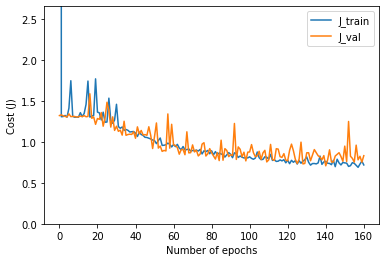

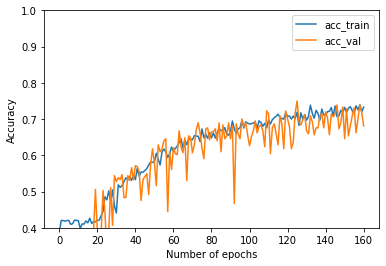

12/12 [==============================] - 1s 37ms/step - loss: 0.9153 - accuracy: 0.6429
test_loss:0.9152726531028748, test_accuracy: 0.6428571343421936
Tester: Classifier training OK


In [42]:
# implement your solution BELOW
LOAD_MODEL_FROM_CHECKPOINT = False
model_checkpoint_folder = "./hazi_3_cnn_checkpoint"
checkpoint_name_to_load = 'cp-0040.ckpt'

if LOAD_MODEL_FROM_CHECKPOINT:
    cl_model.load_weights('/content/cnn_maxpool.h5')   
else:
    model_chkpt = ModelCheckpoint(os.path.join(model_checkpoint_folder, 'cp-{epoch:04d}.ckpt'), verbose=1,\
                                  save_weights_only=True, save_freq=600)
    earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',\
                                         patience=20, restore_best_weights=True)


    history = cl_model.fit_generator(generator=train_generator, validation_data=val_generator,
                                            epochs=1000, verbose=2,
                                            callbacks=[earlystopping_callback, model_chkpt])

    tr_losses = history.history['loss']
    val_losses = history.history['val_loss']

    tr_accs = history.history['accuracy']
    val_accs = history.history['val_accuracy']

    plt.clf()
    plt.plot(tr_losses, label="J_train")
    plt.plot(val_losses, label="J_val")
    y_lim_top = np.maximum(np.amax(val_losses[2:]), np.amax(tr_losses[2:]))*1.5
    plt.ylim((0, y_lim_top))
    plt.xlabel("Number of epochs")
    plt.ylabel("Cost (J)")
    plt.legend()
    plt.show();

    plt.clf()
    plt.plot(tr_accs, label="acc_train")
    plt.plot(val_accs, label="acc_val")
    plt.ylim((0.4, 1.))
    plt.xlabel("Number of epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show();

test_ce, test_acc = cl_model.evaluate(x_test, y_test, verbose=1)
print("test_loss:" + str(test_ce) + ", test_accuracy: " + str(test_acc))

# implement your solution ABOVE

tester.test('cl_training', test_acc)

In [38]:
cl_model.load_weights('/content/hazi_3_cnn_checkpoint/cp-0134.ckpt.data-00000-of-00001')
test_ce, test_acc = cl_model.evaluate(x_test, y_test, verbose=1)
print("test_loss:" + str(test_ce) + ", test_accuracy: " + str(test_acc))


OSError: ignored

###**I**: Teszthalmaz predikciók kirajzolása/kiírása

Rajzolj ki néhány **véletlenszerűen választott** képet a teszthalmazból és írasd ki a betanított modell által becsült legvalószínűbb kategóriacímke nevét!

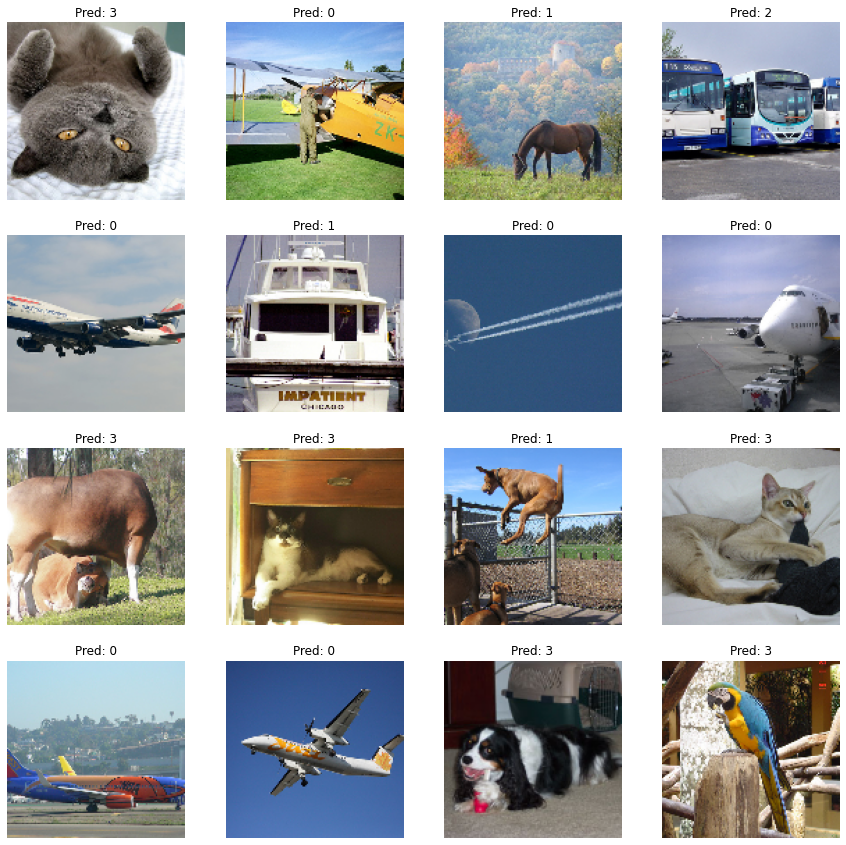

In [43]:
# implement your solution BELOW
rand_indx = np.random.choice(x_test.shape[0], size=4*4)
x_tmp_test = x_test[rand_indx]
y_preds = cl_model.predict(x_tmp_test)
y_preds = np.argmax(y_preds, axis=1)
fig, axes = plt.subplots(4,4)
fig.set_figwidth(15)
fig.set_figheight(15)
for num, axe in enumerate(axes.reshape(-1)):
  axe.imshow(x_tmp_test[num])
  axe.set_title("Pred: " + str(y_preds[num]))
  axe.axis("off")
# implement your solution ABOVE

###**J**: Szegmentációhoz felhasznált kategóriához tartozó képek összegyűjtése és maszkok előállítása

Mint már korábban említve lett, a szegmentációs feladathoz a klasszifikációban nem használt kategóriára fogunk tanítani. Például, ha a **B/1.** részfeladatot kaptad és így a klasszifikációs kategóriáid a ['boat', 'bus', 'car', {'bird', 'cat', 'dog', 'horse', 'sheep', 'cow'}] voltak, akkor a szegmentációhoz csak a kimaradt 'aeroplane' kategória elemeit kell kiválogatnod: a hálót repülőgépek szegmentálására kell finomhangolnod majd. **B/2.** esetén a kimaradt kategória a 'boat', **B/3.** esetén a 'bus', **B/4.** esetén pedig a 'car'.

Szegmentáláshoz az `arr_seg_data` képeket tartalmazó tömb és az `arr_seg_labs` hozzá tartozó pixelszintű annotációs tömb egy részhalmazával dolgozunk tovább. Kizárólag azokat a képeket fogjuk felhasználni a betanításhoz, ahol a képekhez tartozó pixelszintű címkéken legalább egy pixel erejéig megjelenik a szegmentáláshoz választott jármű kategóriánk. Azaz, például a **B/1.** opció esetén, azokat a képeket/címkéket tartjuk meg, ahol a címkében legalább egy pixel azonosítója egyezik az 'aeroplane' kategória eredeti azonosítójával. Ne feledd, az eredeti 10 kategória azonosítóit itt 1-től kezdve sorolták fel, nem nullától kezdve!

Állítsd elő az `xs_seg` és `ys_big_seg` tömböket! Az `xs_seg` tömb alakja (n_chosen_cat_seg_imgs, size_y=128, size_x=128, n_channels=3) és azokat a képeket tartalmazza, ahol a szegmentáláshoz választott kategória azonosítója legalább egy pixel erejéig megjelenik a képekhez tartozó pixelszintű maszkokon.
Az `ys_big_seg` tömb alakja (n_chosen_cat_seg_imgs, size_y=128, size_x=128) és kizárólag 0 és 1 értékeket tartalmaz. Ott lesznek benne 1 értékű pixelek, ahol az eredeti pixelszintű annotációkon a szegmentáláshoz választott kategória azonosítója található. Minden más pixel értéke 0 lesz. Azaz, röviden, bináris maszkokat állítunk elő "választott jármű" és "háttér" kategóriákkal.



In [44]:
# implement your solution BELOW
#CAT_NAMES = ['aeroplane', 'bird', 'boat', 'bus', 'car', 'cat', 'cow', 'dog', 'horse', 'sheep']
CAR_INDEX = 5

car_mask = np.any(arr_seg_labs == 5, axis=(1,2))
xs_seg = arr_seg_data[car_mask]

pre_ys_seg = arr_seg_labs[car_mask]
ys_big_seg = pre_ys_seg == 5


# implement your solution ABOVE

tester.test('seg_dataset_creation', xs_seg, ys_big_seg)

print("Shapes of selected image and mask arrays:", xs_seg.shape, ys_big_seg.shape)

Tester: Segmentation dataset OK
Shapes of selected image and mask arrays: (239, 128, 128, 3) (239, 128, 128)


###**K**: A szegmentáláshoz címkeként használt maszkok leskálázása

Ahhoz, hogy csökkentsük a szegmentáció betanításának számításigényét, leskálázzuk a maszkokat 128x128-ról 16x16-os felbontásra. A leskálázás követendő technikáját a számodra kiosztott részfeladat határozza meg:

- **K/1.**: Leskálázás blokkonkénti átlagolással. Azaz, ha egy pixellé leskálázandó 8x8-as blokkban pl. 27 pixel világos (1) és 37 pixel sötét (0), akkor a blokkból leskálázással kapott pixel értéke 27./64.
- **K/2.**: Leskálázás bináris maszkká. Csupa világos (1) és csupa sötét (0) blokkokat világos és sötét pixelekké alakítunk. Minden olyan blokkot, ahol vegyesen találhatók világos és sötét pixelek, tetszőlegesen világos, vagy sötét pixellé skálázunk le, de nem köztes értékre.

Készítsd el az `ys_big_seg` tömb 16x16 felbontásra leskálázott változatát `ys_seg` néven! A betanításhoz szükséges, hogy a maszk tömb, az input tömbhöz hasonlóan 4 dimenziós legyen, alakja (n_chosen_cat_seg_imgs, 16, 16, 1) lesz.

In [45]:
# implement your solution BELOW
ys_pre_seg = ys_big_seg.astype(np.float32)[:,:,:,None]

ys_seg = tf.image.resize(ys_pre_seg, [16, 16], antialias=False, method='nearest')
print(ys_seg.shape)


# implement your solution ABOVE

tester.test('seg_mask_downscale', ys_seg)

(239, 16, 16, 1)
Tester: Segmentation mask downscale OK


###**L**: Normalizálás és felbontás tanító-, validációs- és teszthalmazra

- Konvertáljuk az `xs_seg` elemeit a D) feladathoz hasonlóan `float32` típusra és a [0,1] intervallumra.
- Bontsuk fel tanító-, validációs- és teszthalmazra a két tömböt. Használjunk 70%/15%/15%-os felosztást. Állítsuk elő így az `x_seg_train`, `x_seg_val`, `x_seg_test` inputokat (képeket) és `y_seg_train`, `y_seg_val`, `y_seg_test` címkéket (maszkokat) tartalmazó tömböket!


In [46]:
# implement your solution BELOW
xs_seg = xs_seg.astype(np.float32)/255.

FIRST_SEG_SECTION = int(xs_seg.shape[0]*0.7)
SECOND_SEG_SECTION = int(xs_seg.shape[0]*0.85)

x_seg_train = xs_seg[0:FIRST_SEG_SECTION]
x_seg_val = xs_seg[FIRST_SEG_SECTION:SECOND_SEG_SECTION]
x_seg_test = xs_seg[SECOND_SEG_SECTION:]

y_seg_train = ys_seg[0:FIRST_SEG_SECTION]
y_seg_val = ys_seg[FIRST_SEG_SECTION:SECOND_SEG_SECTION]
y_seg_test = ys_seg[SECOND_SEG_SECTION:]
# implement your solution ABOVE

tester.test('seg_dataset_split', x_seg_train, x_seg_val, x_seg_test, y_seg_train, y_seg_val, y_seg_test)

Tester: Segmentation dataset split OK


###**M**: Véletlen választott kép-maszk párok kirajzolása

Ellenőrizd le, hogy megfelelő volt-e a képek és maszkok előfeldolgozása! Rajzolj ki néhány véletlenszerűen választott képet az `x_seg_train`, `x_seg_val`, `x_seg_test` tömbök egyikéből és rajzold ki alá/mellé/fölé a hozzá tartozó leskálázott maszkokat is!

[153 115   0  11  33  86]


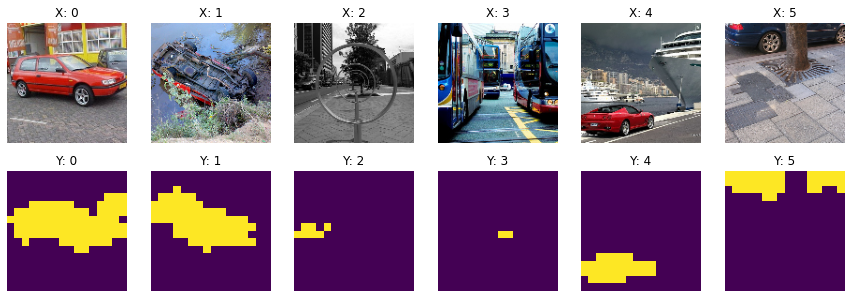

In [48]:
# implement your solution BELOW
fig, axes = plt.subplots(2,6)
choice_indxs = np.random.choice(x_seg_train.shape[0], size=6 )
print(choice_indxs)
fig.set_figwidth(15)
fig.set_figheight(5)
for i in range(6):
  axes[0,i].imshow(x_seg_train[choice_indxs[i]])
  axes[0,i].set_title("X: " + str(i))
  axes[0,i].axis("off")
  axes[1,i].imshow(y_seg_train[choice_indxs[i],:,:,0])
  axes[1,i].set_title("Y: " + str(i))
  axes[1,i].axis("off")


# implement your solution ABOVE

###**N**: FCN (Fully-Convolutional Network) definiálása szegmentációhoz

Definiáld a `seg_model` FCN típusú neuronhálót! A modell nem kell, hogy bonyolult legyen. Nem tartalmazhat teljesen összekötött rétegeket. A háló inputja legyen a klasszifikációra tanított konvolúciós háló azon rétegének kimenete, ahol a heatmap felbontása egyezik a leskálázott maszkok méretével, azaz 16x16! A háló output felbontása is legyen ugyanekkora, utolsó rétegének aktivációs függvénye a bináris klasszifikációhoz használt függvény lehet, hiszen a bináris szegmentációval lényegében pixelenkénti bináris klasszifikációt hajtunk végre. A költségfüggvény is ennek megfelelő kell, hogy legyen.

Egy példa egyszerű FCN hálóra (az előtanított hálóban levő rétegeket nem felsorolva):
- konv. réteg 3x3-as filterrel, 40 filter, ReLU
- konv. réteg 3x3-as filterrel, 20 filter, ReLU
- dropout p=0.3
- konv. réteg 3x3-as filterrel, 1 filter, ReLU.



In [61]:
# implement your solution BELOW
cl_model.trainable = True
k_reg = tf.keras.regularizers.l2()

fnc_conv1_1 = Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=k_reg, bias_regularizer=k_reg)(conv4_3)
drop1 = Dropout(0.2)(fnc_conv1_1)
fnc_conv1_2 = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=k_reg, bias_regularizer=k_reg)(drop1)
drop2 = Dropout(0.2)(fnc_conv1_2)
fnc_conv1_3 = Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=k_reg, bias_regularizer=k_reg)(drop2)
drop3 = Dropout(0.2)(fnc_conv1_3)
fnc_conv1_4 = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=k_reg, bias_regularizer=k_reg)(drop3)
drop4 = Dropout(0.2)(fnc_conv1_4)
fnc_conv1_5 = Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=k_reg, bias_regularizer=k_reg)(drop4)
drop5 = Dropout(0.2)(fnc_conv1_5)
fnc_conv1_6 = Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=k_reg, bias_regularizer=k_reg)(drop5)
drop6 = Dropout(0.2)(fnc_conv1_6)
fnc_conv1_7 = Conv2D(filters=4, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=k_reg, bias_regularizer=k_reg)(drop6)
drop7 = Dropout(0.2)(fnc_conv1_7)
fnc_conv1_8 = Conv2D(filters=2, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=k_reg, bias_regularizer=k_reg)(drop7)
drop8 = Dropout(0.2)(fnc_conv1_8)
fnc_conv1_9 = Conv2D(filters=1, kernel_size=(3,3), padding='same', activation='sigmoid')(drop8)
seg_model = Model(inputs=cl_model.input, outputs=fnc_conv1_9)

seg_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['mae'])
seg_model.summary()
# implement your solution ABOVE

tester.test('seg_architecture', seg_model)

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 32, 32, 128)       0  

###**O**: Input generátorok definiálása augmentáláshoz

Definiáld a `seg_datagen` ImageDataGenerator példányt, melyet a betanítás során a tanító- és a validációs halmaz augmentálásához fogunk használni! Az alábbi augmentációkat végezzék el a példányok:

- Elforgatás (rotate) -45 .. +45 fokkal
- Tükrözés (flip) vízszintesen (függőleges tengelyre)
- A transzformációk következtében lefedetlen pixelek kitöltése: konstans fekete színnel (constant fill_mode)

Továbbá:

- **O/1**: Tükrözés függőlegesen (vízszintes tengelyre), skálázás (zoom) 75% .. 125%-os nagyításra.
- **O/2**: Nyírás (shear) -20% .. +20% közt,  skálázás (zoom) 90% .. 110%-os nagyításra.
- **O/3**: Tükrözés függőlegesen (vízszintes tengelyre), nyírás (shear) -15% .. +15% közt.

Ahogy a **G.** feladatban is, az ImageDataGenerator példány `flow()` tagfüggvénye készíti el magát az iterátort, amiből kinyerhetjük a véletlenszerűen választott, augmentált input-output batch-eket. Ebben az esetben azonban az output-unk is kép, amit azonos módon szeretnénk augmentálni, mint az inputot. Mivel a `flow()` az augmentálandó kép formátumú adatot csak az inputon várja, külön kell meghívnunk az inputra és az outputra: mind az inputot, mind az outputot inputként adjuk be, címkék megadása nélkül. Azonban, így különböző módon augmentálná az input-ot és az output-ot a két iterátor, a képekhez már nem illeszkedne a maszk. Ezért, a `seed` paramétert kell használnunk, méghozzá úgy, hogy az input és az output iterálására külön meghívott `flow()` függvények ugyanazt a `seed` paramétert kapják meg, így az előállított két iterátor pontosan ugyanazokat az augmentálási műveleteket fogja végrehajtani.

A kapott két iterátort ezután össze kell fűznünk, pl. a `zip()` beépített függvény segítségével, hogy az input-output kötegek egy-egy tuple-be kerüljenek be, ahogy azt a Keras Model `fit_generator()` várja.

Állítsd elő ilyen módon a `train_seg_generator` és `val_seg_generator` iterátorokat! A két iterátor előállításhoz, tehát összesen négy `flow()` hívás kell, a tanító- és validációs iterátor párokhoz különböző seed-et illene megadni.


In [62]:
# implement your solution BELOW
params_for_seg_datagen = {
    'rotation_range':45,
    'horizontal_flip':True,
    'fill_mode': 'constant',
    'shear_range': 0.2,
    'zoom_range': 0.1,
}

seg_datagen = ImageDataGenerator(**params_for_seg_datagen)
x_train_seg_it = seg_datagen.flow(x_seg_train, batch_size=32, seed=1)
y_train_seg_it = seg_datagen.flow(y_seg_train, batch_size=32, seed=1)

x_val_seg_it = seg_datagen.flow(x_seg_val, batch_size=32, seed=11)
y_val_seg_it = seg_datagen.flow(y_seg_val, batch_size=32, seed=11)

train_seg_generator = zip(x_train_seg_it,y_train_seg_it)
val_seg_generator = zip(x_val_seg_it,y_val_seg_it)
# implement your solution ABOVE

tester.test('seg_datagen', seg_datagen, train_seg_generator, val_seg_generator)

Tester: Segmentation data generators OK


###**P**: A háló betanítása szegmentációs feladatra

Tanítsd be a `seg_model` FCN típusú neuronhálót a bináris szegmentációs feladatra!

Használd a Keras Model `fit_generator()` tagfüggvényét a tanító- és validációs iterátorokkal a betanításhoz! A tanítás végeztével mérd le a modell hibáját a MAE metrikával a teszthalmazon! Ehhez használd a Model `evaluate()` függvényét: ez kiszámolja a MAE-t, ha előzőleg a megfelelő metrikát megadtad a Model lefordításakor.

**Megjegyzés**: Ez a háló egy percen belül betanítható, így nincs szükség model checkpointokra feltétlenül.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/500
4/4 - 1s - loss: 0.4454 - mae: 0.2172 - val_loss: 0.5574 - val_mae: 0.3283
Epoch 2/500
4/4 - 1s - loss: 0.4209 - mae: 0.2277 - val_loss: 0.5205 - val_mae: 0.2656
Epoch 3/500
4/4 - 1s - loss: 0.4378 - mae: 0.2116 - val_loss: 0.6364 - val_mae: 0.3144
Epoch 4/500
4/4 - 1s - loss: 0.4185 - mae: 0.2132 - val_loss: 0.5475 - val_mae: 0.3002
Epoch 5/500
4/4 - 1s - loss: 0.3946 - mae: 0.1933 - val_loss: 0.5415 - val_mae: 0.3196
Epoch 6/500
4/4 - 1s - loss: 0.4123 - mae: 0.1888 - val_loss: 0.5947 - val_mae: 0.3686
Epoch 7/500
4/4 - 1s - loss: 0.4484 - mae: 0.2531 - val_loss: 0.5636 - val_mae: 0.2609
Epoch 8/500
4/4 - 1s - loss: 0.3721 - mae: 0.1924 - val_loss: 0.5715 - val_mae: 0.2456
Epoch 9/500
4/4 - 1s - loss: 0.4908 - mae: 0.2002 - val_loss: 0.6320 - val_mae: 0.3731
Epoch 10/500
4/4 - 1s - loss: 0.4560 - mae: 0.2543 - val_loss: 0.5697 - val_mae: 0.3108
Epoch 11/500
4/4 - 1s - loss: 0.4349 - mae: 0.2368 - val_loss: 0.7161 - val_mae: 0.2724
Epoch 12/500
4/4 - 1s - loss: 0.3853 - ma

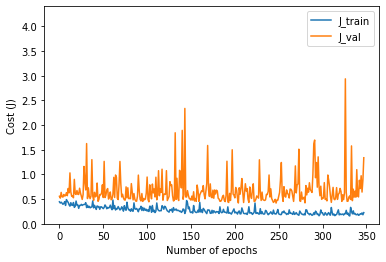

2/2 [==============================] - 0s 20ms/step - loss: 0.3866 - mae: 0.1992
test_loss:0.3866269886493683, test_mae: 0.19924473762512207
Tester: Segmentation training OK


In [69]:
# implement your solution BELOW

seg_earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',\
                                      patience=100, restore_best_weights=True)


seg_history = seg_model.fit_generator(generator=train_seg_generator, validation_data=val_seg_generator,
                                        epochs=500, verbose=2,
                                        callbacks=[seg_earlystopping_callback],
                                        steps_per_epoch = 4,
                                        validation_steps=4
                                        )
tr_losses = seg_history.history['loss']
val_losses = seg_history.history['val_loss']

plt.clf()
plt.plot(tr_losses, label="J_train")
plt.plot(val_losses, label="J_val")
y_lim_top = np.maximum(np.amax(val_losses[2:]), np.amax(tr_losses[2:]))*1.5
plt.ylim((0, y_lim_top))
plt.xlabel("Number of epochs")
plt.ylabel("Cost (J)")
plt.legend()
plt.show();


test_ce, test_mae = seg_model.evaluate(x_seg_test, y_seg_test, verbose=1)
print("test_loss:" + str(test_ce) + ", test_mae: " + str(test_mae))


# implement your solution ABOVE

tester.test('seg_training', test_mae)

###**Q**: Teszthalmaz szegmentációs predikciók kirajzolása

Rajzolj ki néhány **véletlenszerűen választott** képet a teszthalmazból és rajzold ki a hozzájuk becsült maszkokat!

Tester: All tests were successful.


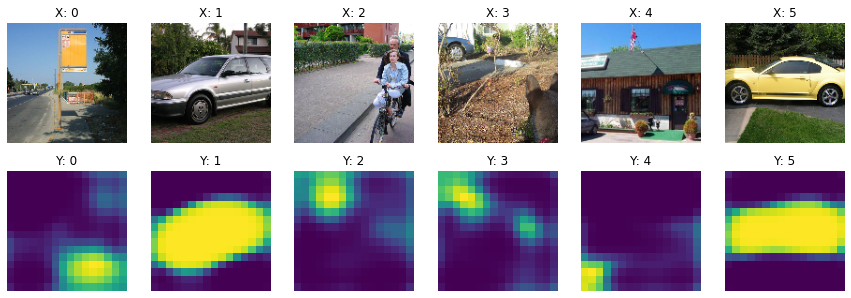

In [73]:
# implement your solution BELOW

rand_indxes = np.random.choice(y_seg_test.shape[0], size=6)
x_seg_topred = x_seg_test[rand_indxes]
y_preds = seg_model.predict(x_seg_topred)
fig, axes = plt.subplots(2,6)
fig.set_figwidth(15)
fig.set_figheight(5)
for i in range(6):
  axes[0,i].imshow(x_seg_topred[i])
  axes[0,i].set_title("X: " + str(i))
  axes[0,i].axis("off")
  axes[1,i].imshow(y_preds[i].reshape(16,16))
  axes[1,i].set_title("Y: " + str(i))
  axes[1,i].axis("off")

# implement your solution ABOVE

tester.print_all_tests_successful()

36